In [3]:
import h5py
import scipy.io as io
import scipy.spatial
from PIL import Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
from tqdm import tqdm
%matplotlib inline

import torchvision.transforms.functional as F

In [6]:
def gaussian_filter_density(gt):
    print (gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print ('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

In [2]:
root = r'C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\'

In [19]:
part_A_train = os.path.join(root,'part_A\\train_data','images')
part_A_test = os.path.join(root,'part_A\\test_data','images')
part_B_train = os.path.join(root,'part_B\\train_data','images')
part_B_test = os.path.join(root,'part_B\\test_data','images')
path_sets = [part_A_train,part_A_test]

In [20]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [9]:
for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground-truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground-truth'), 'w') as hf:
            hf['density'] = k

C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_1.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_10.jpg
(683, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_100.jpg
(654, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_101.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_102.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_103.jpg
(400, 400)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_da

done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_149.jpg
(683, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_15.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_150.jpg
(450, 970)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_151.jpg
(449, 716)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_152.jpg
(600, 800)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_153.jpg
(400, 600)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\tra

done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_199.jpg
(505, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_2.jpg
(713, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_20.jpg
(688, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_200.jpg
(500, 760)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_201.jpg
(530, 800)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_202.jpg
(530, 800)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\trai

done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_248.jpg
(681, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_249.jpg
(451, 800)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_25.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_250.jpg
(681, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_251.jpg
(661, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_252.jpg
(400, 600)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\t

done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_298.jpg
(272, 511)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_299.jpg
(681, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_3.jpg
(664, 1000)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_30.jpg
(645, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_300.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_31.jpg
(1024, 768)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\tra

generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_77.jpg
(684, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_78.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_79.jpg
(820, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_8.jpg
(465, 700)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_80.jpg
(426, 634)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\train_data\images\IMG_81.jpg
(282, 377)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghait

done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_126.jpg
(683, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_127.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_128.jpg
(424, 636)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_129.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_13.jpg
(587, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_130.jpg
(547, 795)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_da

generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_176.jpg
(400, 570)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_177.jpg
(683, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_178.jpg
(683, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_179.jpg
(683, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_18.jpg
(681, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_180.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shangha

done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_61.jpg
(398, 598)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_62.jpg
(480, 624)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_63.jpg
(655, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_64.jpg
(443, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_65.jpg
(400, 682)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\images\IMG_66.jpg
(1024, 743)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\test_data\ima

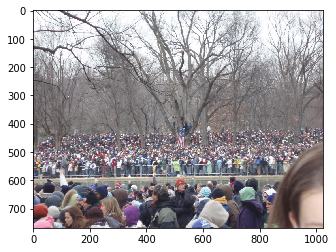

In [5]:
plt.imshow(Image.open(img_paths[0]))

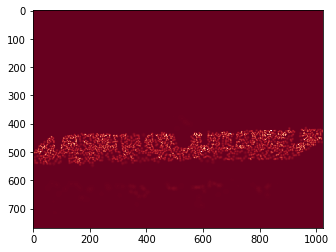

In [16]:
gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground-truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [21]:
path_sets = [part_B_test]
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
        
# creating density map for part_b images

for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground-truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground-truth'), 'w') as hf:
            hf['density'] = k

C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_1.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_10.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_100.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_101.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_102.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_103.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\ima

done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_149.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_15.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_150.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_151.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_152.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_153.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_

done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_199.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_2.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_20.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_200.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_201.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_202.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_da

done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_248.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_249.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_25.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_250.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_251.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_252.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_

done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_298.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_299.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_3.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_30.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_300.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_301.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_da

generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_62.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_63.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_64.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_65.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_66.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_B\test_data\images\IMG_67.jpg
(768, 1024)
generate density...
done.
C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitec

In [1]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                      transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
                  ])

In [2]:
print(transform)

Compose(
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [4]:
root = r'C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\'
part_A_train = os.path.join(root,'part_A\\train_data','images')
part_A_test = os.path.join(root,'part_A\\test_data','images')
part_B_train = os.path.join(root,'part_B\\train_data','images')
part_B_test = os.path.join(root,'part_B\\test_data','images')
path_sets = [part_A_test]

In [5]:
#defining the image path
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
       img_paths.append(img_path)

In [6]:
model = CSRNet()

In [11]:
print(model)

CSRNet(
  (frontend): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilatio

In [7]:
#loading the trained weights
model_path='C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\\0model_best.pth.tar'
checkpoint = torch.load(model_path,map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [9]:
mae = 0
for i in tqdm(range(len(img_paths))):
    img = transform(Image.open(img_paths[i]).convert('RGB'))
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground-truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
print (mae/len(img_paths))

100%|██████████████████████████████████████████████████████████████████████████████| 182/182 [1:38:31<00:00, 32.48s/it]

75.69744921254588


Predicted Count :  721


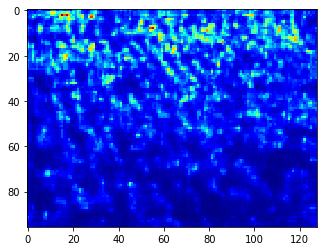

Original Count :  799


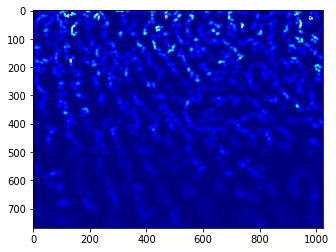

Original Image


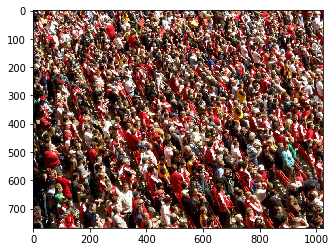

In [10]:
from matplotlib import cm as c
img_path = 'C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\\test_data\\images\\IMG_5.jpg'
img = transform(Image.open(img_path).convert('RGB'))

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
h5_path = 'C:\\Users\\shivani\\Documents\\crowd-counting\\CSRNet-pytorch\\shanghaitech\\part_A\\test_data\\ground-truth\\IMG_5.h5'
temp = h5py.File(h5_path, 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread(img_path))
plt.show()